## Final Project Submission

* Student name: Kai Cansler
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Mark Barbour
* Blog post URL:


# *Sustainable Housing Analysis of King County*
***
## Overview
For the analysis we will be using data from house sales in King County Washington. Our analysis is to predict home prices utilizing a baseline model with added features to understand how sustainable options can change the predicted price.
***

### Business and Data Understanding
Our Data contains information of home sales in kings county. The data has a mixture of numerical and categorical data. As the data extends only about a year of homesales we will not utilize a time series analysis but focus more on linear regression. The dataset includes features such as, grade, condition, zipcode, greenbelt, heating, sewage, and square footage. We want to use these features to understand how sustainability can effect our investment.
<br>
***
### Stakeholders
The stakeholder for this project are Home buyers who are looking for sustainable options for their long term investments. These homebuyers are the growing demographic of enviornmentally conscious consumers. The aim is to show what sustainable options are available for home purchase in Kings County as well as taking a look how some of these sustainable options can benefit our property value. Our shareholders are looking for how proximity to greenbelts, sustainable sewage systems, heating source, and grade can impact the value of our investment as well as the error from the real price to the models prediction.
***

### Import our Libraries
We want to introduce pandas and numpy for preprocessing and managing our dataframe. We will also utilise statsmodels and scipy.stats to complete statistical analysis and build our model. Lastly we will use seaborn and matplotlib for our visualizations.

In [1]:
# We want to begin our modeling but loading all our tools
# import our tools for preprocessing and model building
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats

# import visualization tools
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# We will be using style 'ggplot' for our visualizations
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
# Take a look at the overview of our data
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


### Explore our data
We want to do some exploratory analysis of our features.

1. Clean the data and make our features easier to manage

In [3]:
# Lets turn date column to datetime from object
df['date'] = pd.to_datetime(df['date'])

# Grade column contains string but can be stack ranked numerically
df['grade'] = df.grade.str.split(" ", 1).str[0].astype(int) - 1

In [4]:
# Turn "condition" to ordinal numerical feature
# This is to assess linearity assumption for our model
df.waterfront.replace(
    {'NO': 0, 'YES': 1},
    inplace=True)
df.condition.replace({
    'Poor':1,
    'Fair':2,
    'Average':3,
    'Good':4,
    'Very Good':5
    }, 
    inplace=True)
df.view.replace({
    'NONE':0,
    'FAIR':1,
    'AVERAGE':2,
    'GOOD':3,
    'EXCELLENT':4
    },
    inplace=True)

In [5]:
# Resolve missing data in heat_source and sewer_system
df = df.dropna()

<AxesSubplot:xlabel='condition', ylabel='price'>

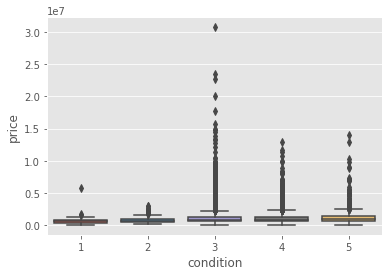

In [6]:
sns.boxplot(x='condition', y='price', data=df)

<AxesSubplot:xlabel='grade', ylabel='price'>

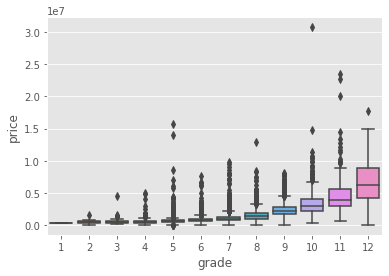

In [7]:
sns.boxplot(x='grade', y='price', data=df)

In [8]:
#df.hist(figsize=(15,15), bins='auto');

2. Our first approach will be to understand our numerical data. We will
    use a correlation matrix for this.

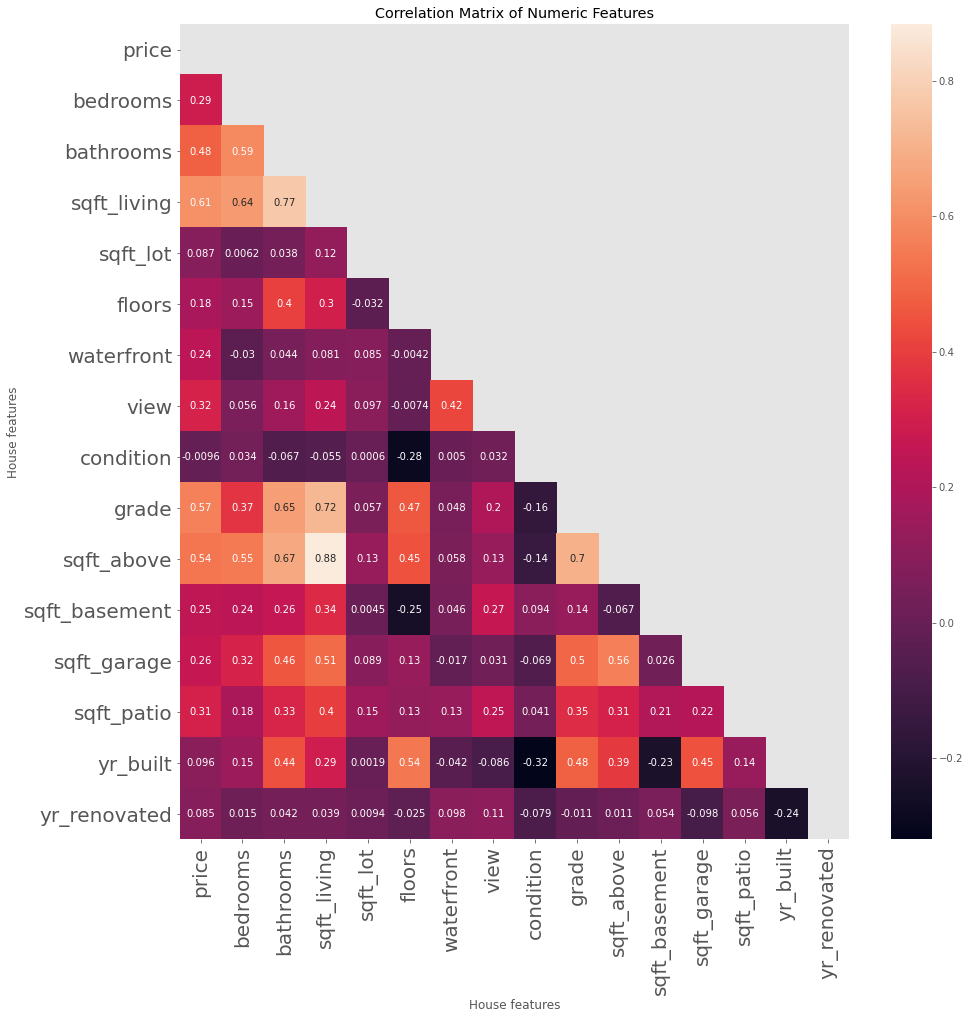

In [9]:
# Separate our useful numerical data for analysis
df = df.select_dtypes(include=[np.number])

# Remove id, lat, and long as they will not be to useful.
df = df.drop(['id', 'long', 'lat'], axis=1)

# corr matrix with duplicates removed for a clearner look
corr_matrix = df.corr()
matrix = np.triu(corr_matrix)

# plot correlation matrix in heat map with seaborn
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(corr_matrix, annot=True, mask=matrix)

# label plot
plt.title('Correlation Matrix of Numeric Features')
plt.xlabel('House features')
plt.ylabel('House features')
plt.xticks(size=20)
plt.yticks(size=20);

In [10]:
# take our correlation matrix and take the absolute value and pivot to create a pairs of features
corr_df=corr_matrix.abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns into a column named pairs
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))

# set index to pairs
corr_df.set_index(['pairs'], inplace = True)

# drop level columns
corr_df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
corr_df.columns = ['corr_coeff']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
corr_df.drop_duplicates(inplace=True)

In [11]:
corr_df[(corr_df.corr_coeff>.75) & (corr_df.corr_coeff<1)]

,corr_coeff
pairs,
"(sqft_living, sqft_above)",0.883733
"(bathrooms, sqft_living)",0.772226


In [12]:
#
df = df[df['grade'] > 3]

df.grade.replace({
    4:0,
    5:1,
    6:2,
    7:3,
    8:4,
    9:5,
    10:6,
    11:7,
    12:8,
    13:9
    }, 
    inplace=True)

There are alot of feature pairs with high correlation.
1. The variables of focus are sqft_above, sqft_living, bathrooms, bedrooms, and sqft_garage. 
2. These have a high risk for multicollinearity so we will choose one feature for our model.

We will be choosing sqft_living as it had the highest correlation with price.

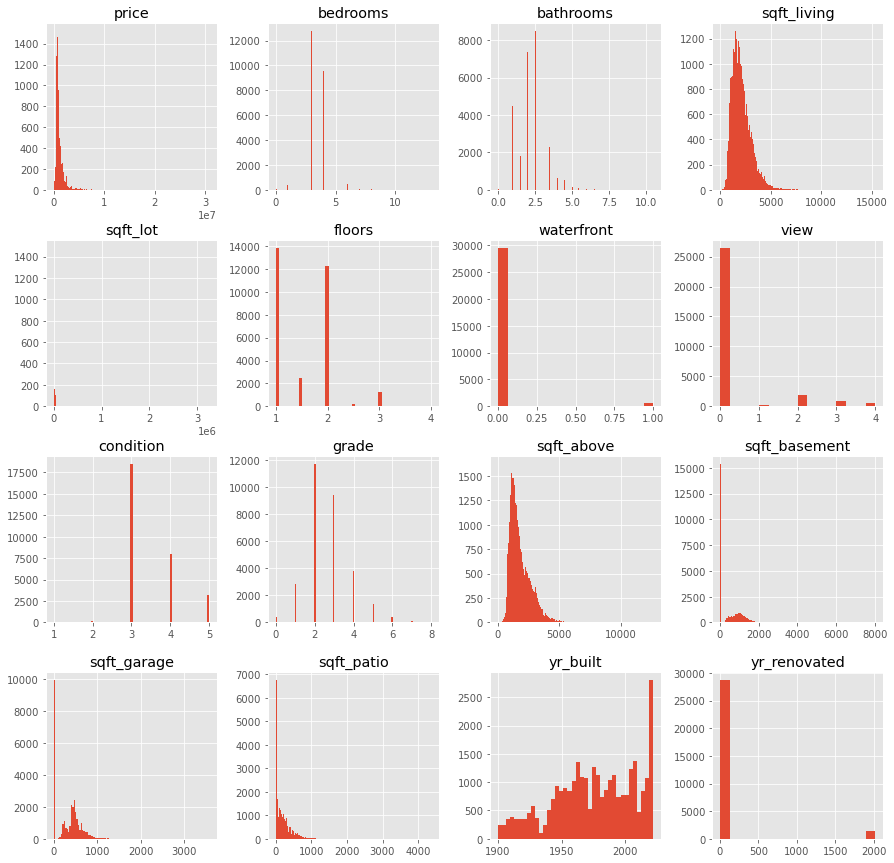

In [13]:
# View the distribution of our variables for normality
df.hist(figsize=(15,15), bins='auto');

In [14]:
y = df['price']
X_preprocessing = df[['sqft_living']]
# X_interaction["price x cabin"] = X_interaction["weight"] * X_interaction["cylinders_4"]
# X_preprocessing = pd.get_dummies(X_preprocessing, columns=['grade','condition'], drop_first=True)

In [15]:
baseline_model = sm.OLS(y, sm.add_constant(X_preprocessing))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                 1.770e+04
Date:                Thu, 09 Nov 2023   Prob (F-statistic):               0.00
Time:                        02:06:30   Log-Likelihood:            -4.4763e+05
No. Observations:               30055   AIC:                         8.953e+05
Df Residuals:                   30053   BIC:                         8.953e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.838e+04   9827.905     -7.975      

***
There is strong correlation coefficient with sqft_living and sqft_above along with bathroom so we will remove those features from our model.

In [16]:
df_target = df[['price', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
               'condition', 'grade', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built']].copy()
y = df_target['price']
X_preprocessing = df_target.drop(['price'], axis=1)
# X_interaction["price x cabin"] = X_interaction["weight"] * X_interaction["cylinders_4"]
# X_preprocessing = pd.get_dummies(X_preprocessing, columns=['grade','condition'], drop_first=True)

In [17]:
formula_model = sm.OLS(y, sm.add_constant(X_preprocessing))
model_results = formula_model.fit()

print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     2476.
Date:                Thu, 09 Nov 2023   Prob (F-statistic):               0.00
Time:                        02:06:30   Log-Likelihood:            -4.4490e+05
No. Observations:               30055   AIC:                         8.898e+05
Df Residuals:                   30043   BIC:                         8.899e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.885e+06   3.26e+05     24.207

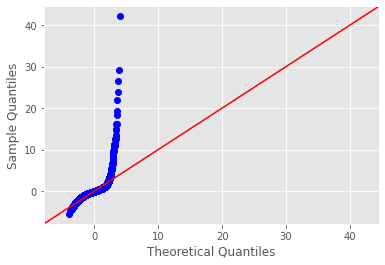

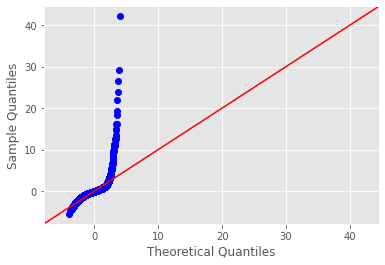

In [18]:
resids = model_results.resid
sm.graphics.qqplot(resids, dist=stats.norm, line='45', fit=True)

***
Our model fails the normality assumption. To resolve this issue we will look to transform our data. From our distribution visualization above we see that price and sqft_living have a large right skew. We will use a log transformation to ensure our normality assumptiosn are not violated.

In [19]:
print("Skew of raw price data: %f" % df['price'].skew()) #check skewness
print("Kurtosis of raw price data: %f" % stats.kurtosis(df['price'],fisher = False)) #check kurtosis
print('')
print("Skew of raw sqft_living data: %f" % df['sqft_living'].skew()) #check skewness
print("Kurtosis of raw sqft_living price data: %f" % stats.kurtosis(df['sqft_living'],fisher = False)) #check kurtosis

Skew of raw price data: 6.612109
Kurtosis of raw price data: 109.313091

Skew of raw sqft_living data: 1.619087
Kurtosis of raw sqft_living price data: 9.755568


In [20]:
df['log_price'] = np.log(df['price'])
df['log_sqft_living'] = np.log(df['sqft_living'])

Skew after Log Transformation: 0.121552
Kurtosis after Log Transformation: 5.472408


/Users/kaicansler/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    30055.000000
mean        13.736775
std          0.581064
min         10.216837
25%         13.384651
50%         13.664688
75%         14.077875
max         17.241401
Name: log_price, dtype: float64

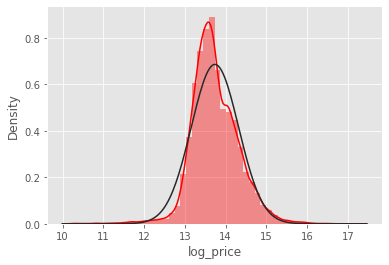

In [21]:
sns.distplot(df['log_price'], fit=stats.norm, color ="r")
print("Skew after Log Transformation: %f" % df['log_price'].skew())
print("Kurtosis after Log Transformation: %f" % stats.kurtosis(df['log_price'],fisher = False))
df['log_price'].describe()

/Users/kaicansler/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skew after Log Transformation: -0.129017
Kurtosis after Log Transformation: 4.508073


count    30055.000000
mean        13.736775
std          0.581064
min         10.216837
25%         13.384651
50%         13.664688
75%         14.077875
max         17.241401
Name: log_price, dtype: float64

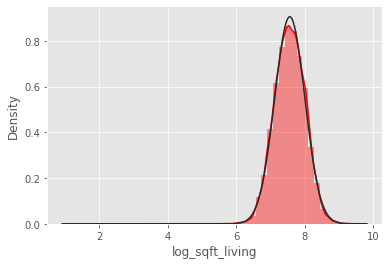

In [22]:
sns.distplot(df['log_sqft_living'], fit=stats.norm, color ="r")
print("Skew after Log Transformation: %f" % df['log_sqft_living'].skew())
print("Kurtosis after Log Transformation: %f" % stats.kurtosis(df['log_sqft_living'],fisher = False))
df['log_price'].describe()

In [23]:
df['log_price'] = (df['log_price'] - df['log_price'].mean()) / df['log_price'].std() 

In [24]:
y = df['log_price']
X = df[['sqft_living']]
log_model = sm.OLS(y, sm.add_constant(X)).fit()

print(log_model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                 1.894e+04
Date:                Thu, 09 Nov 2023   Prob (F-statistic):               0.00
Time:                        02:06:30   Log-Likelihood:                -35301.
No. Observations:               30055   AIC:                         7.061e+04
Df Residuals:                   30053   BIC:                         7.062e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.3533      0.011   -125.065      

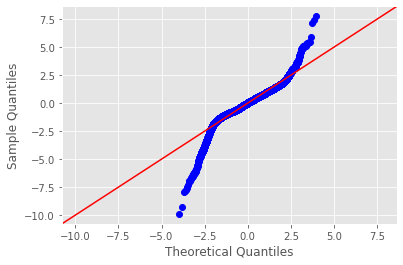

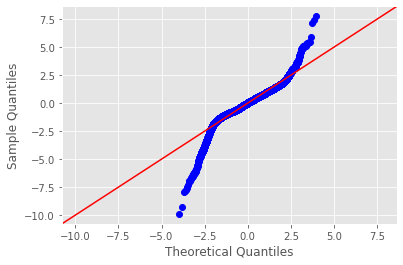

In [25]:
resids = log_model.resid
sm.graphics.qqplot(resids, dist=stats.norm, line='45', fit=True)

In [26]:
y = df['log_price']
X = df[['log_sqft_living', 'grade', 'condition', 'view', 'yr_built', 'waterfront']]
log_model = sm.OLS(y, sm.add_constant(X)).fit()

print(log_model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     4619.
Date:                Thu, 09 Nov 2023   Prob (F-statistic):               0.00
Time:                        02:06:31   Log-Likelihood:                -32824.
No. Observations:               30055   AIC:                         6.566e+04
Df Residuals:                   30048   BIC:                         6.572e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.1049      0.325     

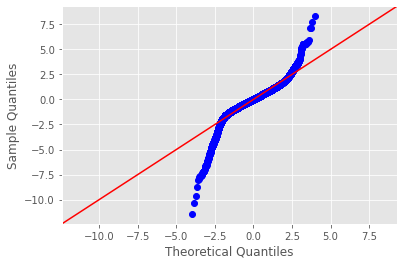

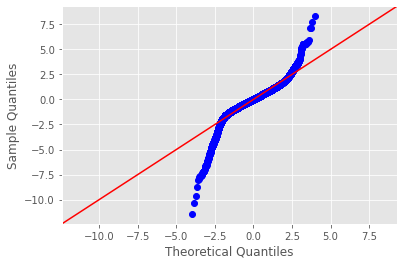

In [27]:
resids = log_model.resid
sm.graphics.qqplot(resids, dist=stats.norm, line='45', fit=True)

In [28]:
def plot_fit_lines(data, results, column, categories, interactions, cmap="plasma"):
    # Extract some shorter variable names for readability
    x = df["log_sqft_living"]
    beta_0 = results.params["const"]
    beta_1 = results.params["log_sqft_living"]
    
    # Set up scatter plot
    fig, ax = plt.subplots(figsize=(10,5))
    data.plot.scatter(x="log_sqft_living", y="log_price", c=column, cmap=cmap, alpha=0.5, ax=ax)

    colors = cm.get_cmap(cmap)
    min_cat = data[column].min()
    max_cat = data[column].max()
    range_cat = max_cat - min_cat
    
    # For each category, calculate and graph the fit line
    for cat in categories:
        if cat in interactions:
            fit_line = beta_0 + \
                (beta_1 + results.params[f"log_sqft_living x {column}_{cat}"]) * x + \
                results.params[f"{column}_{cat}"]
        else:
            fit_line = beta_0 + beta_1 * x + results.params[f"{column}_{cat}"]
            
        ax.plot(
            x,
            fit_line,
            color=colors((cat - min_cat)/range_cat),
            label=f"{column}: {cat}",
            linewidth=5,
            alpha=0.7)

    ax.legend();

***
The outliers may be effecting our model. Let's try removing the outliers and see how that effects our overall model.

In [29]:
# The outliers we identified earlier can be effecting our model.
# Remove the outliers and retry model fitting.
def remove_outliers_zscore(df, columns, threshold=2):
    z_scores = stats.zscore(df[columns])
    return df[(z_scores < threshold).all(axis=1)]

# Remove outliers from the dataset
#df_no_outliers = remove_outliers_zscore(df, ['log_price'])

<AxesSubplot:xlabel='sqft_living', ylabel='log_price'>

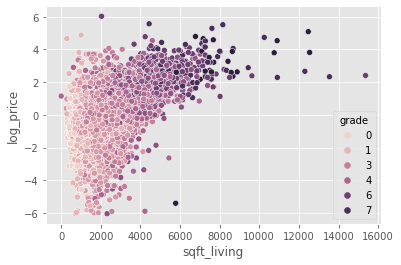

In [33]:
sns.scatterplot(x='sqft_living', y='log_price', data=df, hue='grade')

In [31]:
from sklearn.preprocessing import PolynomialFeatures

poly_root_2 = PolynomialFeatures(degree=-2)

x_2 = pd.DataFrame(poly_root_2.fit_transform(X), columns=poly_root_2.get_feature_names_out(["x"]))
squared_results = sm.OLS(y, x_2).fit()

IndexError: index 0 is out of bounds for axis 1 with size 0

In [ ]:
y = df_no_outliers['log_price']
X = df_no_outliers[['log_sqft_living', 'grade', 'condition', 'view']]
log_model = sm.OLS(y, sm.add_constant(X)).fit()

print(log_model.summary())

In [ ]:
resids = log_model.resid
sm.graphics.qqplot(resids, dist=stats.norm, line='45', fit=True)

In [ ]:
fig = plt.figure(figsize=(15,9))
fig = sm.graphics.plot_regress_exog(log_model, "log_sqft_living", fig=fig)
plt.show()